In [1]:
%pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl
import pandas as pd
import seaborn as sns
import geocoder
from datetime import datetime

In [3]:
context = ssl._create_unverified_context()
url = "https://www.goszakup.gov.kz/ru/search/announce?count_record=100&page=" + str(1)
res = urlopen(url, context=context)
soup = BeautifulSoup(res, "html.parser")

URLError: <urlopen error [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера>

In [ ]:
table = soup.find("table", id="search-result")
rows = table.findAll('tr')

In [ ]:
dataset = {}
for i in range(1, len(rows)):
  cols = rows[i].find_all('td')
  dataset[i] = {}
  dataset[i]["num"] = cols[0].find_all('strong')[0].text
  dataset[i]["name"] = cols[1].find('a').get_text().strip()
  dataset[i]["link"] = cols[1].find('a').get('href')
  dataset[i]["organizer"] = cols[1].find('small').get_text().strip()
  dataset[i]["status"] =  cols[2].text.strip()
  dataset[i]["startdate"] = datetime.strptime(cols[3].get_text(separator = " "), '%Y-%m-%d %H:%M:%S')
  dataset[i]["finaldate"] = datetime.strptime(cols[4].get_text(separator = " "), '%Y-%m-%d %H:%M:%S')
  dataset[i]["price"] = float(cols[5].find_all('strong')[0].text.replace(' ','').replace(',','.'))

In [ ]:
zakupki = pd.DataFrame.from_dict(dataset, orient='index')

In [ ]:
zakupki.head()

,num,name,link,organizer,status,startdate,finaldate,price
1,7575825-1,Средства моющее,/ru/announce/index/7575825,Организатор: Коммунальное государственное казе...,Запрос ценовых предложений,2022-05-06 15:00:00,2022-05-17 15:05:32,23760.00
2,7575818-1,Изготовление и монтаж Ролл-штор,/ru/announce/index/7575818,Организатор: Коммунальное государственное учре...,Запрос ценовых предложений,2022-05-06 15:00:00,2022-05-17 15:00:00,366709.19
3,7575812-1,Оргтехника,/ru/announce/index/7575812,Организатор: Коммунальное государственное пред...,Из одного источника по несостоявшимся закупкам,2022-05-06 14:55:08,2022-05-11 18:00:00,157476.99
4,7575810-1,Приобретение хозяйственных товаров,/ru/announce/index/7575810,Организатор: Республиканское государственное у...,Запрос ценовых предложений,2022-05-11 09:00:00,2022-05-18 09:00:00,22500.00
5,7575809-1,Приобретение хозяйственных товаров,/ru/announce/index/7575809,Организатор: Коммунальное государственное учре...,Из одного источника по несостоявшимся закупкам,2022-05-06 14:55:08,2022-05-11 18:00:00,30000.00


In [ ]:
zakupki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   num        100 non-null    object        
 1   name       100 non-null    object        
 2   link       100 non-null    object        
 3   organizer  100 non-null    object        
 4   status     100 non-null    object        
 5   startdate  100 non-null    datetime64[ns]
 6   finaldate  100 non-null    datetime64[ns]
 7   price      100 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 7.0+ KB


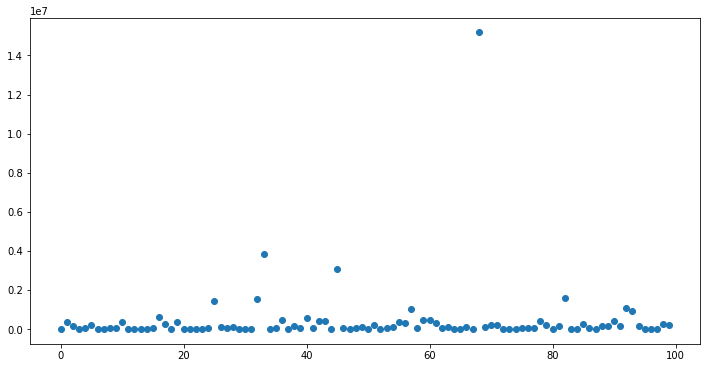

In [ ]:
import matplotlib.pyplot as plt

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(range(100), zakupki['price'], 'o') 

plt.show()

In [ ]:
dataset = {}
for j in range(1, 251):
  try:
    context = ssl._create_unverified_context()
    url = "https://www.goszakup.gov.kz/ru/search/announce?count_record=2000&page=" + str(j)
    res = urlopen(url, context=context)
    soup = BeautifulSoup(res, "html.parser")
    table = soup.find("table", id="search-result")
    rows = table.findAll('tr')
    n = j*2000
    for i in range(1, len(rows)):
      cols = rows[i].find_all('td')
      dataset[i + n] = {}
      dataset[i + n]["num"] = cols[0].find_all('strong')[0].text
      dataset[i + n]["name"] = cols[1].find('a').get_text().strip()
      dataset[i + n]["link"] = cols[1].find('a').get('href')
      dataset[i + n]["organizer"] = cols[1].find('small').get_text().strip()
      dataset[i + n]["status"] =  cols[2].text.strip()
      dataset[i + n]["startdate"] = datetime.strptime(cols[3].get_text(separator = " "), '%Y-%m-%d %H:%M:%S')
      dataset[i + n]["finaldate"] = datetime.strptime(cols[4].get_text(separator = " "), '%Y-%m-%d %H:%M:%S')
      dataset[i + n]["price"] = float(cols[5].find_all('strong')[0].text.replace(' ','').replace(',','.'))
    print("Page ", j, " done")
  except:
    print("An exception occurred")

In [ ]:
zakupki = pd.DataFrame.from_dict(dataset, orient='index')

In [ ]:
zakupki.drop_duplicates(keep=False,inplace=True)

In [ ]:
zakupki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   num        500 non-null    object        
 1   name       500 non-null    object        
 2   link       500 non-null    object        
 3   organizer  500 non-null    object        
 4   status     500 non-null    object        
 5   startdate  500 non-null    datetime64[ns]
 6   finaldate  500 non-null    datetime64[ns]
 7   price      500 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 35.2+ KB


In [ ]:
zakupki["address"] = None

In [ ]:
adddata = {}
for i, row in zakupki.iterrows():
  if i<85:
    continue
  url = "https://www.goszakup.gov.kz" + row["link"]
  res = urlopen(url, context=context)
  soup = BeautifulSoup(res, "html.parser")
  table = soup.find("table", {"class":"table table-bordered table-hover table-striped"})
  rows = table.findAll('tr')
  for j in range(len(rows)):
    if "адрес организатора" in rows[j].find('th').text:
      zakupki.at[i,"address"] = rows[j].find('td').text
      break
  print(i, end=" ")

85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [ ]:
zakupki.head()

,num,name,link,organizer,status,startdate,finaldate,price,address
1,7575151-1,"ведро и швабра, тряпка для удаления пыли",/ru/announce/index/7575151,Организатор: Коммунальное государственное учре...,Запрос ценовых предложений,2022-05-06 14:39:07,2022-05-17 15:39:14,23316.00,"233620100, 060100, Казахстан, г. КУЛЬСАРЫ, ул...."
2,7575150-1,Приобретение веник - совок для уборки,/ru/announce/index/7575150,Организатор: Республиканское государственное у...,Из одного источника по несостоявшимся закупкам,2022-05-06 13:39:13,2022-05-11 18:00:00,10714.28,"632810000, 071412, Казахстан, г. Семей, ул. Ст..."
3,7575149-1,Приобретение хозяйственных товаров,/ru/announce/index/7575149,Организатор: Коммунальное государственное учре...,Из одного источника по несостоявшимся закупкам,2022-05-06 13:39:09,2022-05-11 18:00:00,32691.36,"434430100, 120400, Казахстан, г. Айтеке би, ул..."
4,7575148-1,Услуга по обязательному техническому осмотру т...,/ru/announce/index/7575148,"Организатор: Государственное учреждение ""Турке...",Из одного источника по несостоявшимся закупкам,2022-05-06 13:39:07,2022-05-11 18:00:00,136000.00,"611010000, 161200, Казахстан, г. Туркестан, ул..."
5,7575147-1,Шины летние для легковых автомобилей,/ru/announce/index/7575147,Организатор: Коммунальное государственное пред...,Из одного источника по несостоявшимся закупкам,2022-05-06 13:39:08,2022-05-11 18:00:00,88000.00,"231010000, 060006, Казахстан, г. Атырау, ул. Б..."


In [ ]:
zakupki["code1"] = None
zakupki["code2"] = None

In [ ]:
for i, row in zakupki.iterrows():
  l = row["address"].split(',')
  zakupki.at[i, "code1"] = l[0]
  zakupki.at[i, "code2"] = l[1]

In [ ]:
z_copy = zakupki.copy()

In [ ]:
for i, row in zakupki.iterrows():
  l = row["address"].split(',')
  zakupki.at[i, "address"] = "".join(l[2:])

In [ ]:
zakupki.head()

,num,name,link,organizer,status,startdate,finaldate,price,address,code1,code2,lon,lat
1,7575825-1,Средства моющее,/ru/announce/index/7575825,Организатор: Коммунальное государственное казе...,Запрос ценовых предложений,2022-05-06 15:00:00,2022-05-17 15:05:32,23760.00,Казахстан г. Зайсан ул. ШАКАРИМА д. 1А оф.,634620100,070700,None,None
2,7575818-1,Изготовление и монтаж Ролл-штор,/ru/announce/index/7575818,Организатор: Коммунальное государственное учре...,Запрос ценовых предложений,2022-05-06 15:00:00,2022-05-17 15:00:00,366709.19,Восточно-Казахстанская область Усть-Каменогор...,Казахстан,631010000,None,None
3,7575812-1,Оргтехника,/ru/announce/index/7575812,Организатор: Коммунальное государственное пред...,Из одного источника по несостоявшимся закупкам,2022-05-06 14:55:08,2022-05-11 18:00:00,157476.99,Восточно-Казахстанская область Усть-Каменогор...,КАЗАХСТАН,631010000,None,None
4,7575810-1,Приобретение хозяйственных товаров,/ru/announce/index/7575810,Организатор: Республиканское государственное у...,Запрос ценовых предложений,2022-05-11 09:00:00,2022-05-18 09:00:00,22500.00,Казахстан г. Усть-Каменогорск ул. Леваневског...,631010000,070013,None,None
5,7575809-1,Приобретение хозяйственных товаров,/ru/announce/index/7575809,Организатор: Коммунальное государственное учре...,Из одного источника по несостоявшимся закупкам,2022-05-06 14:55:08,2022-05-11 18:00:00,30000.00,Казахстан г. Каскелен ул. АУБАЙ БАЙГАЗИЕВ д. ...,195220100,040900,None,None


In [ ]:
GEO_TOKEN = "pk.eyJ1IjoiYW5peWFyYXNzZXQiLCJhIjoiY2wyN2Vzdm95MDZmcDNrcm04ZGRnYWRwaiJ9.RSiLEjFoYH89SiXomr3LpA"

In [ ]:
zakupki["lon"] = None
zakupki["lat"] = None

In [ ]:
for i, row in zakupki.iterrows():
  g = geocoder.mapbox(row["address"], key=GEO_TOKEN, country="KZ", language="RU")
  zakupki.at[i, "lon"] = g.json['lng']
  zakupki.at[i, "lat"] = g.json['lat']
  print(i, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [ ]:
zakupki.head()

,num,name,link,organizer,status,startdate,finaldate,price,address,code1,code2,lon,lat
1,7575825-1,Средства моющее,/ru/announce/index/7575825,Организатор: Коммунальное государственное казе...,Запрос ценовых предложений,2022-05-06 15:00:00,2022-05-17 15:05:32,23760.00,Казахстан г. Зайсан ул. ШАКАРИМА д. 1А оф.,634620100,070700,84.8758,47.465
2,7575818-1,Изготовление и монтаж Ролл-штор,/ru/announce/index/7575818,Организатор: Коммунальное государственное учре...,Запрос ценовых предложений,2022-05-06 15:00:00,2022-05-17 15:00:00,366709.19,Восточно-Казахстанская область Усть-Каменогор...,Казахстан,631010000,82.578641,49.988599
3,7575812-1,Оргтехника,/ru/announce/index/7575812,Организатор: Коммунальное государственное пред...,Из одного источника по несостоявшимся закупкам,2022-05-06 14:55:08,2022-05-11 18:00:00,157476.99,Восточно-Казахстанская область Усть-Каменогор...,КАЗАХСТАН,631010000,82.578641,49.988599
4,7575810-1,Приобретение хозяйственных товаров,/ru/announce/index/7575810,Организатор: Республиканское государственное у...,Запрос ценовых предложений,2022-05-11 09:00:00,2022-05-18 09:00:00,22500.00,Казахстан г. Усть-Каменогорск ул. Леваневског...,631010000,070013,82.578641,49.988599
5,7575809-1,Приобретение хозяйственных товаров,/ru/announce/index/7575809,Организатор: Коммунальное государственное учре...,Из одного источника по несостоявшимся закупкам,2022-05-06 14:55:08,2022-05-11 18:00:00,30000.00,Казахстан г. Каскелен ул. АУБАЙ БАЙГАЗИЕВ д. ...,195220100,040900,76.635148,43.199797


In [ ]:
!pip install chart-studio

     |████████████████████████████████| 64 kB 1.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=d73eb9bf205271a0e2672edafd899b9faf9ea529690bee41a2d0c073d9f4d8bc
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio.plotly as py
import chart_studio.tools as tl
import chart_studio.graph_objs as go
import pandas as pd

# Change API key for Plotly 

tl.set_credentials_file(username='aschrock', api_key='CWwy1WgujKrPK4Z1J0Oh')

# Add Mapbox access token here 

mapbox_access_token = 'pk.eyJ1IjoiYXNjaHJvY2siLCJhIjoiY2p2NnRoeHc2MDkxbTQ0bnR6aTVwZDNsaCJ9.MA76hkxD3rOGgnVCDBVC9w'

df = pd.read_csv('http://geohub.lacity.org/datasets/259473fbb4b34ff182581f411fe4c918_49.csv')

# Save latitude and longitude as variables. In this dataset, the X column is longitude and the Y column is latitude. 

site_lat = df.Y
site_lon = df.X
locations_name = df.Name

# Generate the data for the map 

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=3,
            color='rgb(255, 0, 0)',
            opacity=1
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.8
        ),
        hoverinfo='none'
    )]


# Generate a layout around Los Angeles, zoomed in so we can see the data points 

layout = go.Layout(
    title='LA Public Schools',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=34.0537,
            lon=-118.2427
        ),
        pitch=0,
        zoom=10,
        style='light'
    ),
)
	
# Generate the figure using the iplot function 
  
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Los Angeles Public Elementary Schools')

ModuleNotFoundError: ignored

In [ ]:
res = urlopen(url, context=context)
soup = BeautifulSoup(res, "html.parser")

In [ ]:
table = soup.find_all("table")[0]
rows = table.findAll('tr')

In [ ]:
dic = {}
dic["method"] = rows[0].find('td').text
dic["type"] = rows[1].find('td').text
dic["class"] = rows[2].find('td').text
dic["organizer"] = rows[3].find('td').text
dic["organizer_address"] = rows[4].find('td').text
dic["n_lots"] = int(rows[5].find('td').text)
dic["sum"] = float(rows[6].find('td').text.replace(' ','').replace(',','.'))
dic["mark"] = rows[7].find('td').text.strip()

ValueError: ignored

In [ ]:
dic

{'class': 'Услуга',
 'mark': 'Без учета НДС',
 'method': 'Запрос ценовых предложений',
 'n_lots': 1,
 'organizer': '060540007332 Коммунальное государственное учреждение "Общеобразовательная Исатайская средняя школа" отдела образования Исатайского района Управления образования Атырауской области"',
 'organizer_address': 'Казахстан, 234239100, Атырауская область, Исатайский район, Исатайский с.о., с.Исатай, ул. ЖУМАБАЙ КУАНЫШЕВ, д. 20, оф. ',
 'sum': 30000.0,
 'type': 'Первая закупка '}

In [ ]:
table = soup.find("table", id="search-result")
rows = table.findAll('tr')

In [ ]:
with open('zakupki0.json', 'w', encoding='utf-8') as f:
  f.write(zakupki.to_json())

In [ ]:
# Download the file.
from google.colab import files
files.download('zakupki0.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>